In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
k_values = range(1, 11)

# data_2d

In [3]:
path_2d = '/content/drive/MyDrive/Colabs/data_hw6/data_2d.csv'

In [4]:
df_2d = pd.read_csv(path_2d)
df_2d.columns = ['y', 'c0', 'c1']
print(df_2d.head(10))
print(df_2d.shape)

     y        c0        c1
0  0.0  2.687848  2.366961
1  0.0 -0.201379  0.470430
2  0.0  0.608496  1.225400
3  0.0 -0.082282  1.137218
4  0.0  2.083069  2.694482
5  0.0  1.503020  1.074847
6  0.0  0.391662 -0.287497
7  0.0  0.321377  1.296743
8  0.0  0.591248  0.126716
9  0.0  1.150578 -0.266404
(199, 3)


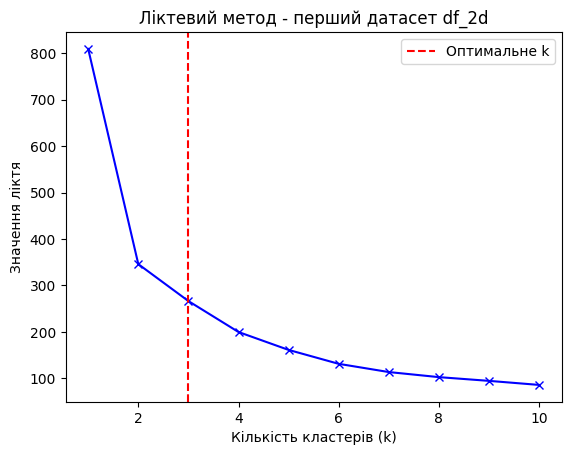

In [5]:
X_2d = df_2d.drop(columns='y')
y_2d = df_2d['y']
inertia_values_df_2d = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_2d)
    inertia_values_df_2d.append(kmeans.inertia_)

plt.plot(k_values, inertia_values_df_2d, 'bx-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Значення ліктя')
plt.title('Ліктевий метод - перший датасет df_2d')
plt.axvline(x=3, color='r', linestyle='--', label='Оптимальне k')
plt.legend()
plt.show()

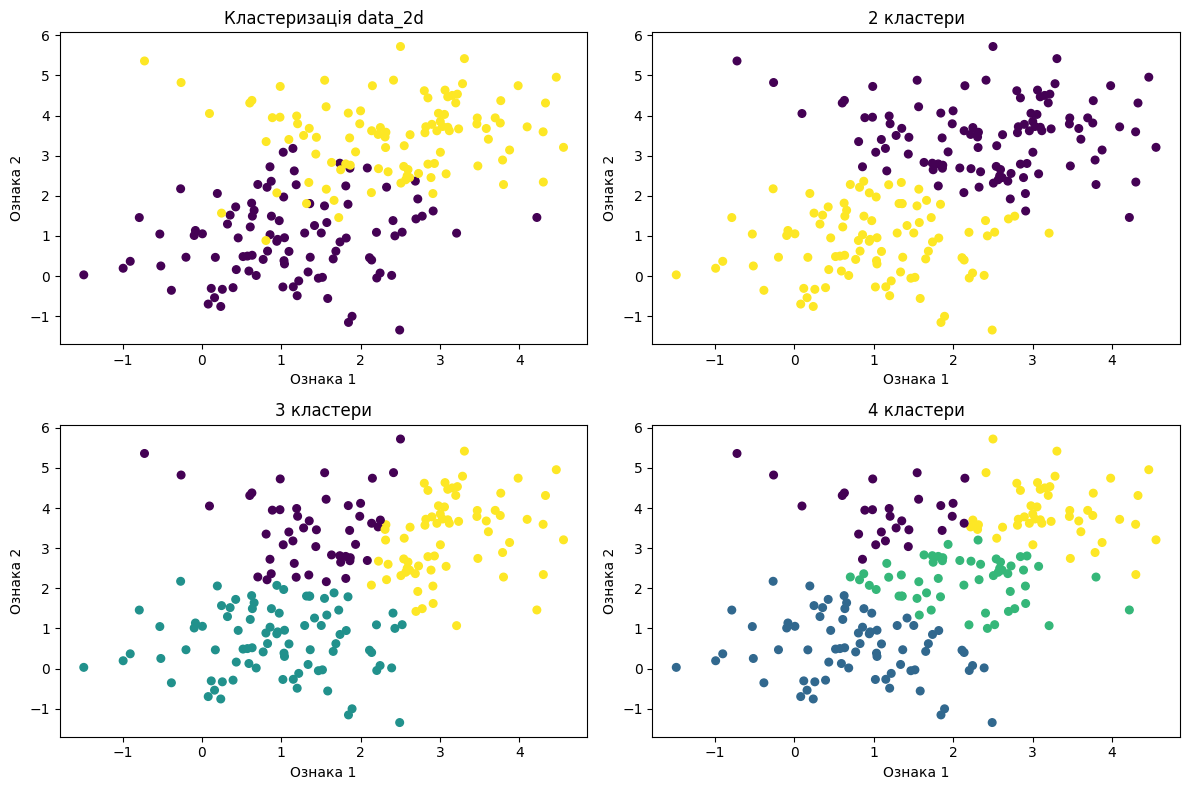

In [6]:
# Візуалізація кластерів
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.scatter(df_2d['c0'], df_2d['c1'], c=df_2d['y'], s=30)
plt.title('Кластеризація data_2d')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(222)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_2d)
labels = kmeans.labels_
plt.scatter(X_2d['c0'], X_2d['c1'], c=labels, s=30)
plt.title('2 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(223)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_2d)
labels = kmeans.labels_
plt.scatter(X_2d['c0'], X_2d['c1'], c=labels, s=30)
plt.title('3 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(224)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_2d)
labels = kmeans.labels_
plt.scatter(X_2d['c0'], X_2d['c1'], c=labels, s=30)
plt.title('4 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.tight_layout()
plt.show()

# mnist

In [7]:
path_mnist = '/content/drive/MyDrive/Colabs/data_hw6/mnist.csv'

In [8]:
df_mnist = pd.read_csv(path_mnist, header=None)
print(df_mnist.head(10))
print(df_mnist.shape)

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
6    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
7    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
8    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
9    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0 

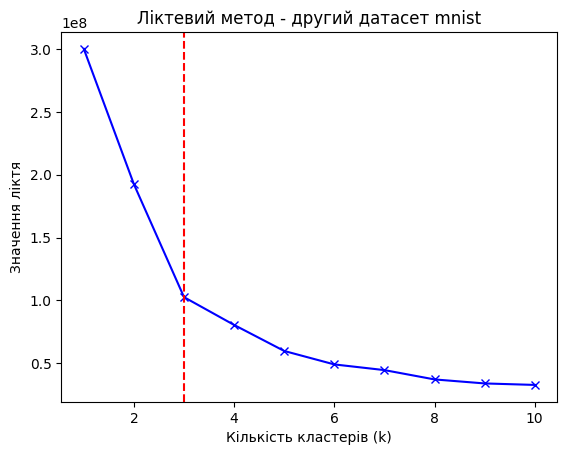

In [9]:
X_mnist = df_mnist.drop([0], axis=1)
y_mnist = df_mnist[0]
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)
inertia_values_df_mnist = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_mnist_pca)
    inertia_values_df_mnist.append(kmeans.inertia_)

plt.plot(k_values, inertia_values_df_mnist, 'bx-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Значення ліктя')
plt.title('Ліктевий метод - другий датасет mnist')
plt.axvline(x=3, color='r', linestyle='--', label='Оптимальне k')
plt.show()

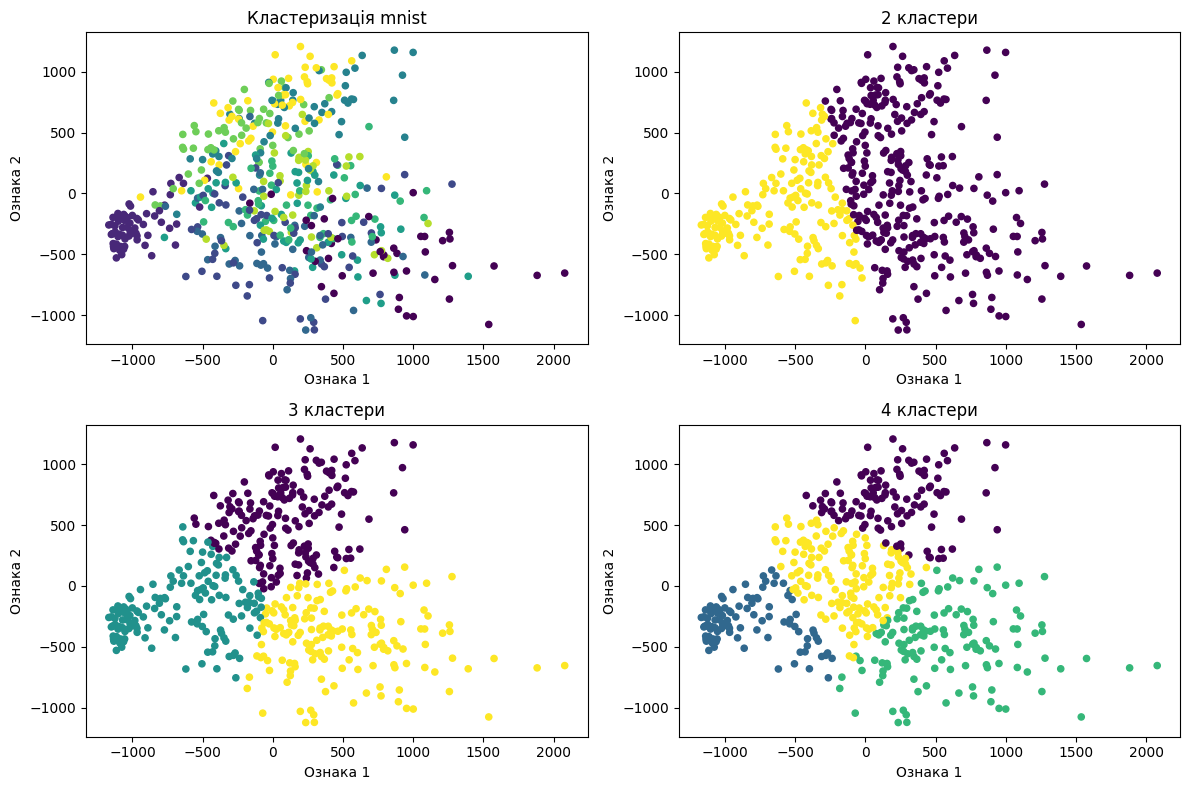

In [10]:
# Візуалізація кластерів
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c = y_mnist, s=20)
plt.title('Кластеризація mnist')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(222)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_mnist_pca)
labels = kmeans.labels_
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, s=20)
plt.title('2 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(223)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_mnist_pca)
labels = kmeans.labels_
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, s=20)
plt.title('3 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.subplot(224)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_mnist_pca)
labels = kmeans.labels_
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, s=20)
plt.title('4 кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')

plt.tight_layout()
plt.show()

## Висновок
- Було використано алгоритм K-means для кластеризації даних у двох різних датасетах.
- У другому датасеті дані було зменшено до 2-вимірного простору за допомогою методу PCA. Використання PCA дозволяє зменшити розмірність даних, зберігаючи важливу інформацію про варіативність даних.
- За допомогою ліктевого методу було визначено оптимальну кількість кластерів. Для першого датасету - 3 кластери, для другого - 3 кластери.
- Алгоритм K-means зміг ефективно розділити дані на кластери залежно від їхньої схожості. Результати кластеризації візуалізовано на графіках, де кожен кластер позначений окремим кольором.
- Алгоритм K-means виявився ефективним для кластеризації даних у обох датасетах. Результати кластеризації можуть бути використані для подальшого аналізу та виявлення закономірностей в даних.